# ROC and AUC Curve

AUC-ROC (Area Under the Receiver Operating Characteristic Curve) is a widely used evaluation metric for binary classification problems. Here are some practical examples of when to use AUC-ROC for evaluation:

1. Medical Diagnosis: Evaluate the performance of a model that predicts the presence or absence of a disease (e.g., cancer, diabetes) based on medical imaging or lab results.
2. Credit Risk Assessment: Assess the ability of a model to predict loan defaults or creditworthiness based on credit history, income, and other factors.
3. Spam Detection: Evaluate the performance of a model that classifies emails as spam or not spam based on content and sender features.
4. Customer Churn Prediction: Predict which customers are likely to switch to a different service provider based on usage patterns, demographics, and other factors.
5. Fault Detection: Evaluate the performance of a model that detects faulty products or equipment based on sensor readings and other data.
6. Recommendation Systems: Assess the ability of a model to recommend relevant products or services based on user behavior and preferences.
7. Security Threat Detection: Evaluate the performance of a model that detects potential security threats, such as intrusion detection or malware detection.
8. Quality Control: Predict which products are likely to fail quality control checks based on manufacturing data and other factors.

Use AUC-ROC when:

- You have a binary classification problem (positive/negative, yes/no, etc.).
- You want to evaluate the model's ability to distinguish between positive and negative classes.
- You need to compare the performance of different models or algorithms.
- You want to evaluate the model's performance across different thresholds or cutoff points.

Note that AUC-ROC has some limitations, such as:

- It assumes a binary classification problem.
- It does not provide insight into the model's performance on specific subgroups or classes.
- It can be sensitive to class imbalance (unequal numbers of positive and negative samples).

In such cases, consider using additional metrics, such as precision, recall, F1-score, or class-specific metrics, to complement AUC-ROC evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2]:
y_test_pred = classifier.predict(X_test)

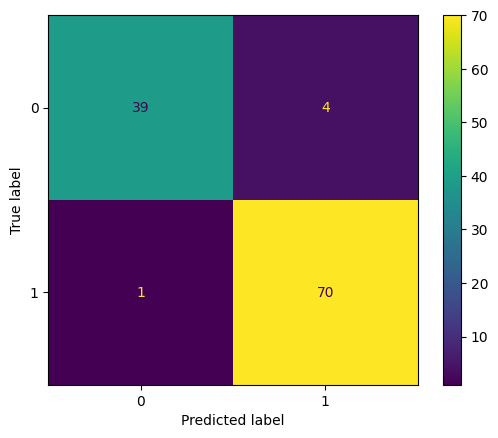

In [3]:
CM = confusion_matrix(y_test, y_test_pred)
CM_disp = ConfusionMatrixDisplay(confusion_matrix=CM)
CM_disp.plot()

In [4]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



![cm](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

In [5]:

# Predict probabilities for the test set
probs = classifier.predict_proba(X_test)
probs_positive = probs[:, 1]  # probabilities of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)
roc_auc = auc(fpr, tpr)


![ROC2](https://miro.medium.com/v2/resize:fit:1358/1*Bgc9QOjhnL70g2SQxyj6hQ.png)

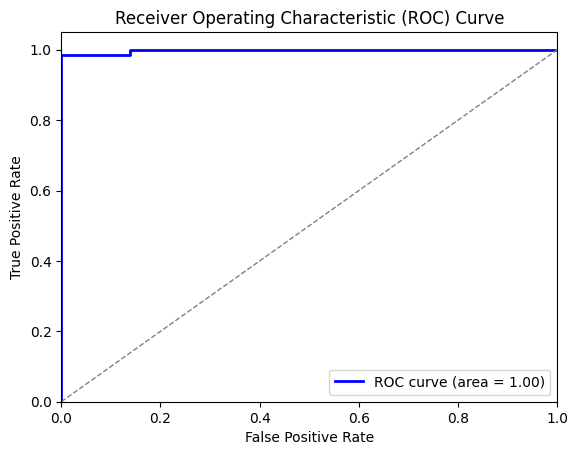

In [6]:

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Explanation:

1. We load the breast cancer dataset using scikit-learn's `load_breast_cancer` function.
2. The dataset is split into training and testing sets using `train_test_split`.
3. We train a logistic regression classifier on the training data.
4. The classifier's probabilities of predicting the positive class are computed using `predict_proba`.
5. We compute the ROC curve and AUC (Area Under the Curve) using `roc_curve` and `auc`.
6. Finally, we plot the ROC curve using Matplotlib.

Interpretation of results:
- The ROC curve plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings.
- The area under the ROC curve (AUC) provides a single scalar value summarizing the classifier's performance. AUC closer to 1 indicates better performance, while 0.5 represents a random classifier.

In practice, you would compare the ROC curve and AUC of multiple classifiers to determine which one performs better for your specific task.

Interpretation:

- The ROC curve shows the trade-off between True Positive Rate (TPR, correctly classified setosa) and False Positive Rate (FPR, mistakenly classified as setosa).
- A perfect classifier would have a ROC curve hugging the top left corner, achieving 100% TPR (all setosa correctly identified) with 0% FPR (no mistakes).
- Our AUC score (0-1) represents the area under the ROC curve. A higher score (closer to 1) indicates better classification performance.
- Analyze the curve and AUC score in the context of your specific problem. Here, a high AUC would be desirable for accurately identifying Iris setosa flowers.


> never be below the diagonal line. Maximize TPR. Minimize FPR.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Logistic Regression: 0.99 +/- 0.01
Random Forest: 0.99 +/- 0.00
Support Vector Machine: 0.97 +/- 0.02


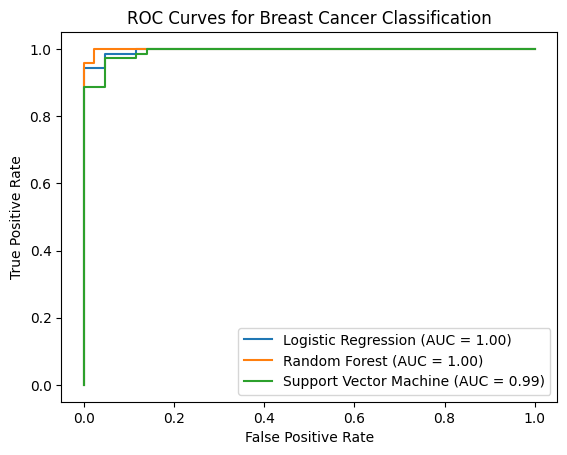

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

# Load breast cancer dataset
data = load_breast_cancer()

# Split dataset into features (X) and target variable (y)
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Define classification models with class weights
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Support Vector Machine": SVC(probability=True, class_weight='balanced')
}

# Create a figure and axis object
fig, ax = plt.subplots()

# Loop through each model
for name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name}: {scores.mean():.2f} +/- {scores.std():.2f}")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict probabilities on the testing data
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute AUC-ROC score
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot ROC curve
    ax.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Set plot title and labels
ax.set_title("ROC Curves for Breast Cancer Classification")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

# Add legend
ax.legend()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your dataset
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'/pima-indians-diabetes.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:

# Split data into features (X) and target (y)
X = df.drop(8, axis=1)
y = df[8]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

BaggingLR: AUC-ROC = 0.808
AdaBoost: AUC-ROC = 0.752
GradientBoosting: AUC-ROC = 0.810
RandomForest: AUC-ROC = 0.819


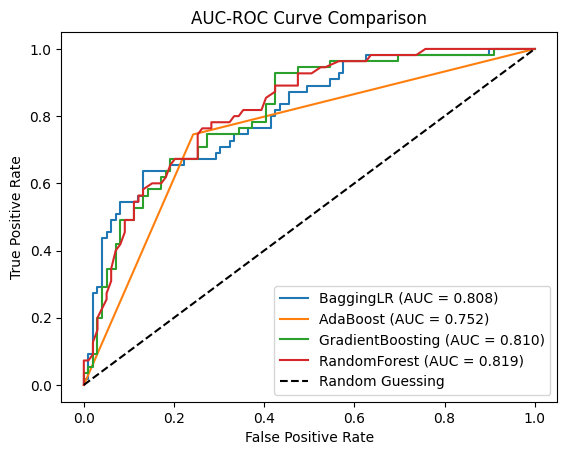

In [22]:

# Define models
models = {
    'BaggingLR': BaggingClassifier(base_estimator=LogisticRegression()),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

# Train models and predict probabilities
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate AUC-ROC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc:.3f}')
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison')
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

BaggingLR: AUC-ROC = 0.831
AdaBoost: AUC-ROC = 0.673
GradientBoosting: AUC-ROC = 0.825
RandomForest: AUC-ROC = 0.826


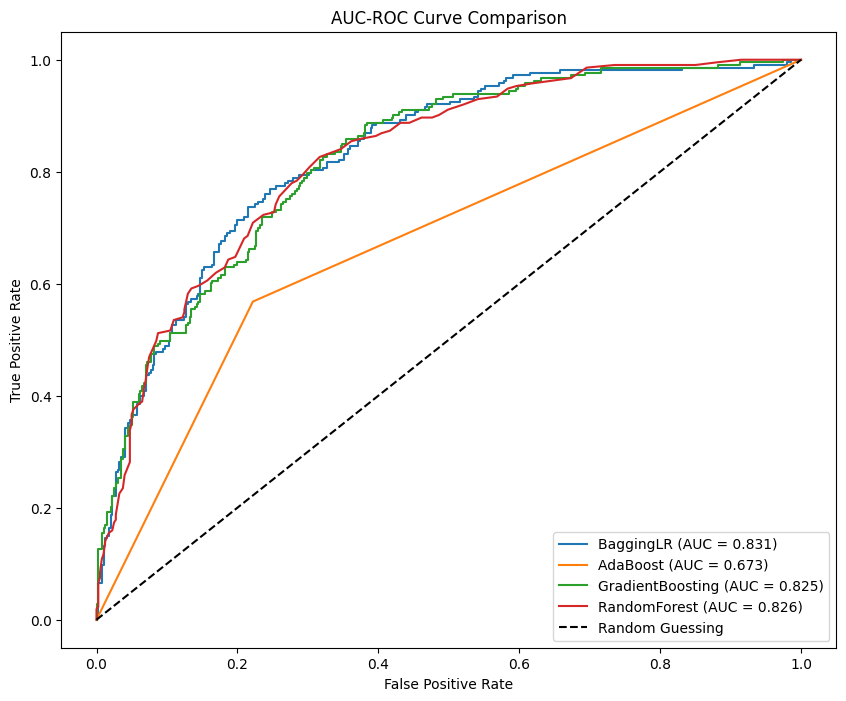

In [24]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    'BaggingLR': BaggingClassifier(estimator=LogisticRegression(), n_estimators=100),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
    'RandomForest': RandomForestClassifier(n_estimators=100)
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize plot
plt.figure(figsize=(10, 8))

# Train models and evaluate with cross-validation
for name, model in models.items():
    # Get cross-validated predictions
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
    
    # Calculate AUC-ROC score
    auc = roc_auc_score(y_train, y_pred_proba)
    print(f'{name}: AUC-ROC = {auc:.3f}')
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison')
plt.legend()
plt.show()


With Cross Validation

In [20]:

# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.3f} (+/- {scores.std():.3f})")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

Bagging: 0.767 (+/- 0.024)
AdaBoost: 0.723 (+/- 0.029)
GradientBoosting: 0.770 (+/- 0.026)
RandomForest: 0.766 (+/- 0.030)


Yes, the AUC-ROC curve can be used for multiclass prediction, but it requires some modifications compared to the binary classification case. Here’s how it works:

### **1. Binary vs. Multiclass AUC-ROC**

- **Binary Classification**: In binary classification, the ROC (Receiver Operating Characteristic) curve is plotted by comparing the True Positive Rate (TPR) and False Positive Rate (FPR) at various threshold levels. The AUC (Area Under the Curve) summarizes the performance of the model—an AUC of 1 represents a perfect model, while an AUC of 0.5 represents a model with no discriminative ability.

- **Multiclass Classification**: In multiclass classification, where there are more than two classes, the concept of an ROC curve is extended in a few different ways. The general idea is to compute the ROC curve and AUC for each class separately, treating each class as a binary problem (one-vs-rest). The AUC values can then be averaged to give a single performance metric.

### **2. Methods for Multiclass AUC-ROC**

There are a couple of common approaches for using AUC-ROC in multiclass classification:

#### **a. One-vs-Rest (OvR) Approach**
   - **How It Works**: For each class, an ROC curve is generated by treating that class as the positive class and all other classes as the negative class. This results in one ROC curve per class.
   - **Averaging**: The AUC values for each class can be averaged to get a single value, often using one of the following methods:
     - **Macro-Averaging**: Calculates the average of the AUCs across all classes, treating each class equally.
     - **Micro-Averaging**: Aggregates the contributions of all classes to compute a single ROC curve and corresponding AUC, treating each prediction equally regardless of class.

#### **b. One-vs-One (OvO) Approach**
   - **How It Works**: This method involves generating ROC curves for each pair of classes. For `n` classes, you would generate `n(n-1)/2` ROC curves.
   - **Averaging**: Similar to OvR, the AUC values for each pair of classes are averaged to produce an overall AUC.

### **3. Example in Python Using One-vs-Rest**

Here’s how you can compute the multiclass AUC-ROC using the One-vs-Rest approach in Python:

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load a sample dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train a model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_score = model.predict_proba(X_test)

# Compute AUC-ROC for each class
auc_roc = roc_auc_score(y_test, y_score, average=None)
print("AUC-ROC for each class:", auc_roc)

# Compute average AUC-ROC
macro_auc_roc = roc_auc_score(y_test, y_score, average="macro")
micro_auc_roc = roc_auc_score(y_test, y_score, average="micro")
print("Macro-Averaged AUC-ROC:", macro_auc_roc)
print("Micro-Averaged AUC-ROC:", micro_auc_roc)
```

### **Explanation**

- **Label Binarization**: `label_binarize()` is used to convert the multiclass labels into a binary format, which is required for calculating ROC and AUC.
- **Model Training**: A logistic regression model is trained, though any classifier that can output probability scores could be used.
- **AUC-ROC Calculation**: The `roc_auc_score()` function is used to compute the AUC for each class. Macro-averaged and micro-averaged AUCs are also calculated.

### **Output Example**

```plaintext
AUC-ROC for each class: [1.         0.98901099 0.99725275]
Macro-Averaged AUC-ROC: 0.9954219124132043
Micro-Averaged AUC-ROC: 0.9955555555555555
```

- **Class-Specific AUC-ROC**: This output gives the AUC for each class.
- **Macro-Averaged AUC-ROC**: Averages the AUCs across all classes, giving equal weight to each class.
- **Micro-Averaged AUC-ROC**: Aggregates across all instances, giving equal weight to each prediction.

### **When to Use Which Averaging?**

- **Macro-Averaging**: Use when you want to treat all classes equally, which is often preferred in balanced datasets.
- **Micro-Averaging**: Use when you want to give equal weight to each prediction, which might be useful in imbalanced datasets.

### **Summary**

- The AUC-ROC curve is indeed applicable to multiclass problems through methods like one-vs-rest or one-vs-one.
- The result is typically a set of AUC values, which can be averaged to get a single performance metric.

If you have more questions or need further assistance, feel free to ask!

## Threshold Adjustment

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


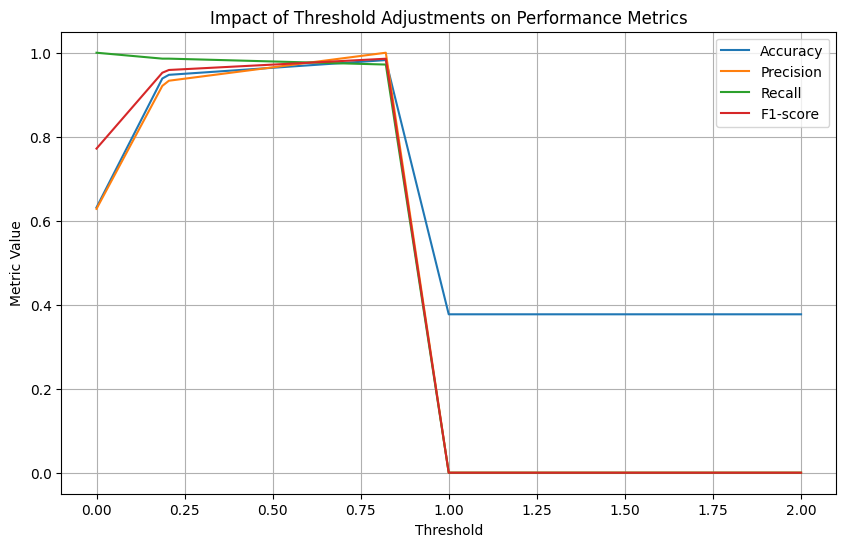

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metric values
thresholds_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterate over different threshold values
for threshold in thresholds:
    # Predict labels based on the current threshold
    y_pred = (probs_positive > threshold).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metric values to lists
    thresholds_list.append(threshold)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the impact of threshold adjustments on performance metrics
plt.figure(figsize=(10, 6))
plt.plot(thresholds_list, accuracy_list, label='Accuracy')
plt.plot(thresholds_list, precision_list, label='Precision')
plt.plot(thresholds_list, recall_list, label='Recall')
plt.plot(thresholds_list, f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Impact of Threshold Adjustments on Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


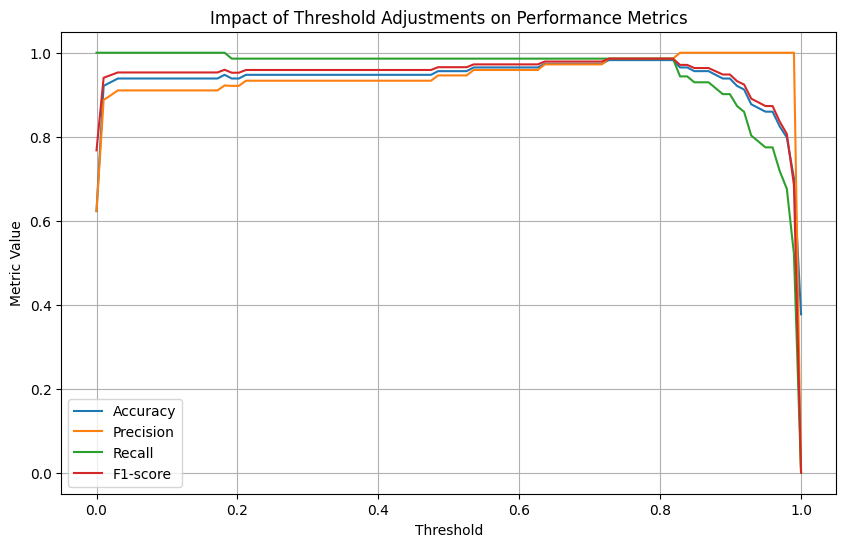

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store metric values
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Iterate over different threshold values
for threshold in np.linspace(0, 1, 100):  # Adjust the number of thresholds as needed
    # Predict labels based on the current threshold
    y_pred = (probs_positive > threshold).astype(int)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append metric values to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot the impact of threshold adjustments on performance metrics
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 1, 100), accuracy_list, label='Accuracy')
plt.plot(np.linspace(0, 1, 100), precision_list, label='Precision')
plt.plot(np.linspace(0, 1, 100), recall_list, label='Recall')
plt.plot(np.linspace(0, 1, 100), f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Impact of Threshold Adjustments on Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()


To apply the chosen threshold (e.g., 70%) in your model, you can use it to classify predictions based on the predicted probabilities. Any predicted probability greater than or equal to the threshold will be classified as the positive class, and any predicted probability less than the threshold will be classified as the negative class.

Here's how you can apply the threshold to your model predictions:



In [11]:
# Define the chosen threshold
chosen_threshold = 0.7  # You can adjust this threshold as needed

# Predict labels based on the chosen threshold
y_pred_thresholded = (probs_positive >= chosen_threshold).astype(int)

# Evaluate the performance of the thresholded predictions
accuracy_thresholded = accuracy_score(y_test, y_pred_thresholded)
precision_thresholded = precision_score(y_test, y_pred_thresholded)
recall_thresholded = recall_score(y_test, y_pred_thresholded)
f1_thresholded = f1_score(y_test, y_pred_thresholded)

# Print the performance metrics
print("Performance metrics with chosen threshold:")
print("Accuracy:", accuracy_thresholded)
print("Precision:", precision_thresholded)
print("Recall:", recall_thresholded)
print("F1-score:", f1_thresholded)

Performance metrics with chosen threshold:
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-score: 0.979020979020979



In this code:

- We define the chosen threshold (`chosen_threshold`) as 0.7 (70%).
- We classify predictions based on whether the predicted probabilities (`probs_positive`) are greater than or equal to the chosen threshold.
- We calculate performance metrics (accuracy, precision, recall, F1-score) for the thresholded predictions using scikit-learn's functions.
- We print the performance metrics to evaluate the model's performance using the chosen threshold.

Adjust the `chosen_threshold` as needed based on your analysis of the ROC curve and the desired trade-offs between sensitivity and specificity.